Missing values in each column:
Day-ahead Total Load Forecast [MW] - Ireland (IE)    12584
Actual Total Load [MW] - Ireland (IE)                18118
dtype: int64


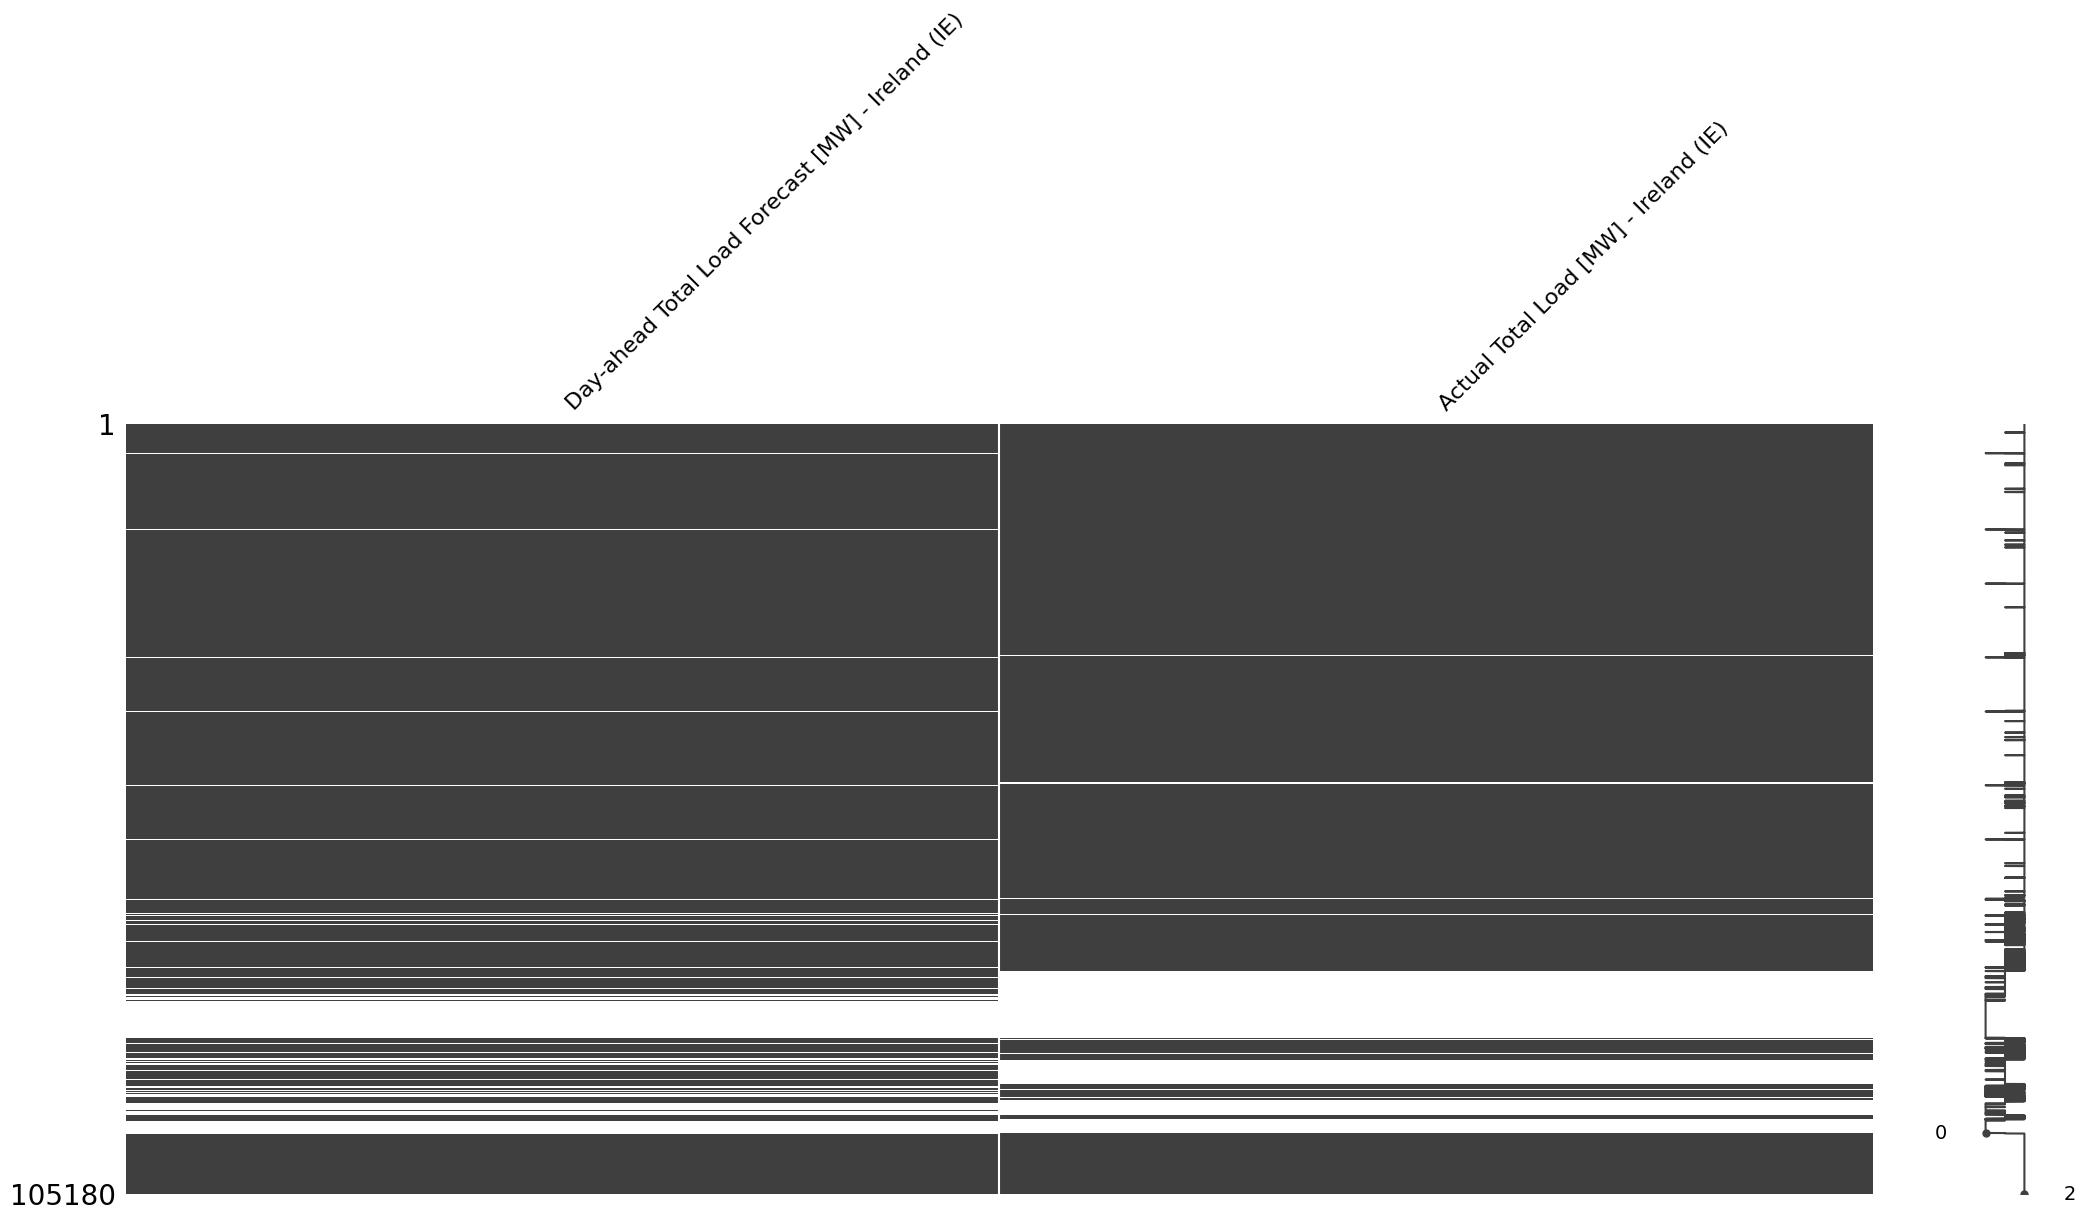

First timestamp with missing data:  2018-01-25 02:00:00
Last timestamp with missing data:  2023-07-12 23:30:00


In [1]:
import pandas as pd

df_12h = pd.read_csv('Total-Load-Day-Ahead-Actual_2018-2023.csv')


import matplotlib.pyplot as plt
import missingno as msno

df_12h['Time (CET/CEST)'] = df_12h['Time (CET/CEST)'].str.split(' - ').str[0]
df_12h['Time (CET/CEST)'] = pd.to_datetime(df_12h['Time (CET/CEST)'], dayfirst=True)
df_12h = df_12h.set_index('Time (CET/CEST)')

# Then check the missing values and range again
print("Missing values in each column:")
print(df_12h.isna().sum())

# Visualize the missing values
msno.matrix(df_12h)
plt.show()

# Get only the rows with at least one missing value
missing_rows = df_12h[df_12h.isna().any(axis=1)]

# Print the first and last timestamp of the missing data
print("First timestamp with missing data: ", missing_rows.index.min())
print("Last timestamp with missing data: ", missing_rows.index.max())


In [2]:
import pandas as pd

df_12h = pd.read_csv('Total-Load-Day-Ahead-Actual_2018-2023.csv')


import matplotlib.pyplot as plt
import missingno as msno

df_12h['Time (CET/CEST)'] = df_12h['Time (CET/CEST)'].str.split(' - ').str[0]
df_12h['Time (CET/CEST)'] = pd.to_datetime(df_12h['Time (CET/CEST)'], dayfirst=True)
df_12h = df_12h.set_index('Time (CET/CEST)')
missing_values = df_12h[df_12h.isna().any(axis=1)]

# Check the time difference between consecutive missing values
missing_values['missing_intervals'] = missing_values.index.to_series().diff()

# Display the intervals with the highest frequency
print(missing_values['missing_intervals'].value_counts().head())



'''
Largest consecutive missing data for Forecast load starts at: 2022-06-30 01:00:00
Largest consecutive missing data for Forecast load ends at: 2022-10-15 01:00:00
Largest consecutive missing data for Actual load starts at: 2022-04-06 05:00:00
Largest consecutive missing data for Actual load ends at: 2022-10-13 10:00:00
'''


0 days 00:30:00    19992
0 days 01:30:00       60
0 days 02:30:00       42
0 days 05:30:00       28
0 days 03:30:00       25
Name: missing_intervals, dtype: int64


C:\Users\ridva\AppData\Local\Temp\ipykernel_1764\4098649536.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values['missing_intervals'] = missing_values.index.to_series().diff()


'\nLargest consecutive missing data for Forecast load starts at: 2022-06-30 01:00:00\nLargest consecutive missing data for Forecast load ends at: 2022-10-15 01:00:00\nLargest consecutive missing data for Actual load starts at: 2022-04-06 05:00:00\nLargest consecutive missing data for Actual load ends at: 2022-10-13 10:00:00\n'

In [3]:
# Using list(df) to get the list of all Column Names
column_headers = list(df_12h)
print(column_headers)
print("   ")


['Day-ahead Total Load Forecast [MW] - Ireland (IE)', 'Actual Total Load [MW] - Ireland (IE)']
   
